# Data Wringling and Exploratory Data Analysis (EDA)

* [1. Datasets](#1)
* [2. Store-related input files](#2)
    * [2.1 Products](#2.1)
    * [2.2 Aisles](#2.2)
    * [2.3 Departments](#2.3)
    * [2.4 EDA](#2.4)
        * [2.4.1 Aisles and departments with the highest number products](#2.4.1)
        * [2.4.2 Aisle and department missing labels](#2.4.2)
        * [2.4.3 Product numbering scheme](#2.4.3)
* [3. Customer-related input files](#3)
    * [3.1 Orders](#3.1)
    * [3.2 Products in prior orders](#3.2)
    * [3.3 Products in future orders for model training](#3.3)
    * [3.4 Products in future orders for model testing (prediction)](#3.4)
    * [3.5 EDA](#3.5)
        * [3.5.1 Shop's most popular products](#3.5.1)
        * [3.5.2 Number of customer orders and number of products per order](#3.5.2)
            * [3.5.2.1 Number of products vs order number matrix](#3.5.2.1)
        * [3.5.3 Customer shopping habits](#3.5.3)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl # colors
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import datetime as dt
import pickle

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.xmargin'] = 0.02
plt.rcParams['axes.ymargin'] = 0.1
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.bbox'] = 'tight'

#plt.rcParams['figure.figsize'] = (8.0, 10.0)

## 1. Datasets <a id='1'></a>

There are seven files related to this project, all downloaded from the [Kaggle Instacart competion site](https://www.kaggle.com/c/instacart-market-basket-analysis/data):

In [2]:
!ls -lrt data/*.csv

-rw-r--r-- 1 robertc robertc       270 May  1  2017 data/departments.csv
-rw-r--r-- 1 robertc robertc      2603 May  1  2017 data/aisles.csv
-rw-r--r-- 1 robertc robertc   2166953 May  1  2017 data/products.csv
-rw-r--r-- 1 robertc robertc  24680147 May  1  2017 data/order_products__train.csv
-rw-r--r-- 1 robertc robertc 108968645 May  1  2017 data/orders.csv
-rw-r--r-- 1 robertc robertc 577550706 May  1  2017 data/order_products__prior.csv
-rw-r--r-- 1 robertc robertc   1475693 Jun 20  2018 data/sample_submission.csv


Three of them contain store-related data (departments, aisles, products), while the remaining four files contain information on the customers' orders. 

Let's start with reading in the store-related data:

## 2. Store-related information <a id='2'></a>

In [3]:
p = pd.read_csv("./data/products.csv")
a = pd.read_csv("./data/aisles.csv")
d = pd.read_csv("./data/departments.csv")

p.shape, a.shape, d.shape

((49688, 4), (134, 2), (21, 2))

The store sells almost 50k products, organized in 134 aisles and 21 departments. 

Let's inspect the datasets now:

### 2.1 Products <a id='2.1'></a>

In [4]:
p.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [5]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


### 2.2 Aisles <a id='2.2'></a>

In [6]:
a.head(10)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [7]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


### 2.3 Departments <a id='2.3'></a>

In [8]:
d

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [9]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


Good. This is a relational set of files with common columns (aisle_id, department_id), so we can merge them into one file using SQL-like joining in pandas and prepare some EDA plots.

### 2.4  EDA <a id='2.4'></a>

#### 2.4.1  Aisles and departments with the highest number products <a id='2.4.1'></a>

So let's merge the 3 files together to find the aisles and departments that offer the most products:

In [10]:
pad = p.merge(a,on='aisle_id',how='left').merge(d,on='department_id',how='left')#.set_index('product_id')
pad.shape

(49688, 6)

In [11]:
pad.head(20)

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry
5,6,Dry Nose Oil,11,11,cold flu allergy,personal care
6,7,Pure Coconut Water With Orange,98,7,juice nectars,beverages
7,8,Cut Russet Potatoes Steam N' Mash,116,1,frozen produce,frozen
8,9,Light Strawberry Blueberry Yogurt,120,16,yogurt,dairy eggs
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,water seltzer sparkling water,beverages


Was the merging successful?

In [12]:
pad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49688 entries, 0 to 49687
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
 4   aisle          49688 non-null  object
 5   department     49688 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.7+ MB


Yes. We have the same number of rows as in the original products.csv file, ad no null entries in any of the columns. 

What departments and aisles offer the highest number of products?

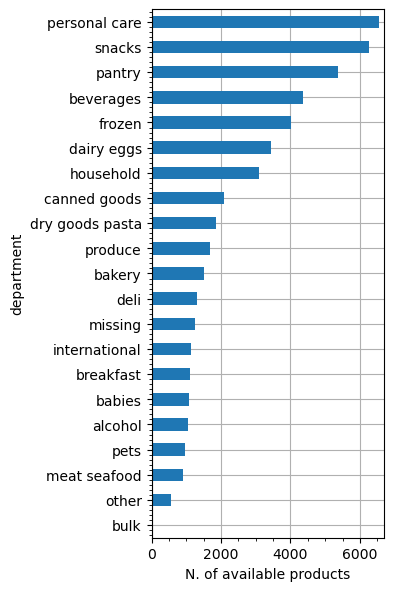

In [13]:
pad.groupby('department')['product_name'].count().sort_values().plot.barh(figsize=(3,7))
plt.xlabel('N. of available products');

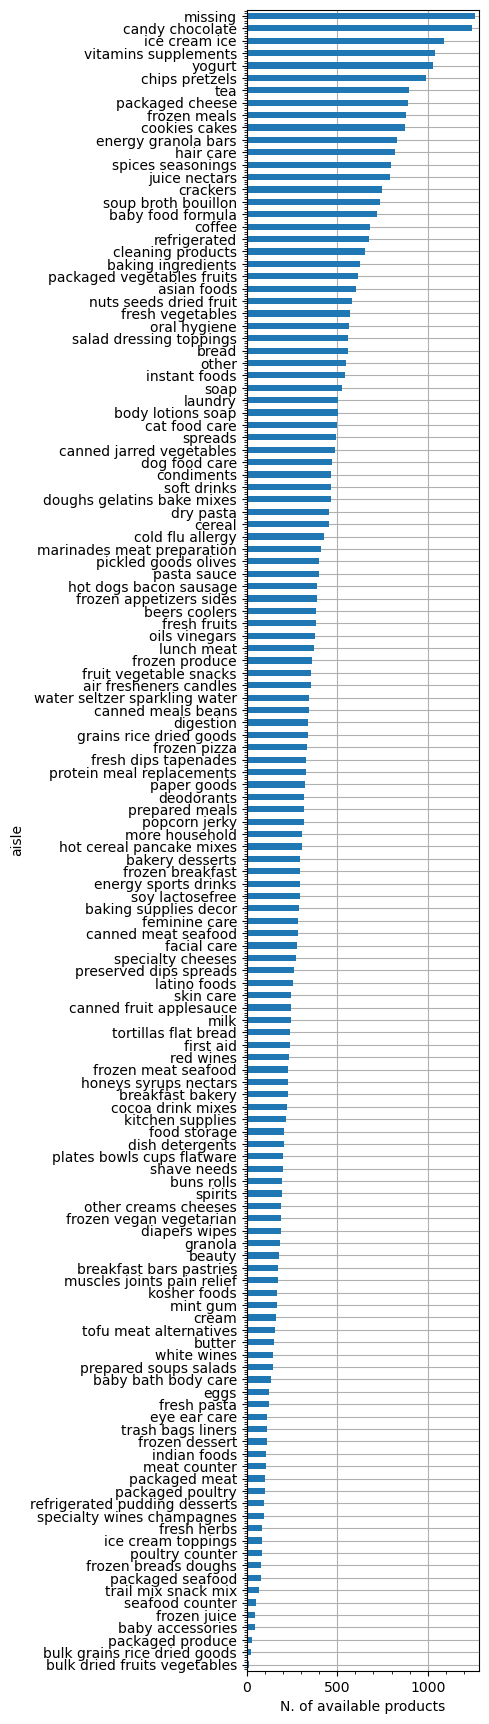

In [14]:
pad.groupby('aisle')['product_name'].count().sort_values().plot.barh(figsize=(3,22))
plt.xlabel('N. of available products');

#### 2.4.2 Aisle and department missing labels <a id='2.4.2'></a>

About 1250 products appear in the department and the aisle called 'missing'. Does the 'missing' department automatically imply that the aisle info is 'missing' too? And vice-versa?: 

In [15]:
pad[pad['department'].str.contains('missing')]['aisle'].unique()

array(['missing'], dtype=object)

In [16]:
pad[pad['aisle'].str.contains('missing')]['department'].unique()

array(['missing'], dtype=object)

Yes, there's the one-to-one correspondence. OK, and what's the name of the products that correspond to those 'missing' entries?:

In [17]:
pad[pad['department'].str.contains('missing')]['product_name'].head(20)

37                        Ultra Antibacterial Dish Liquid
71                              Organic Honeycrisp Apples
109                                Uncured Turkey Bologna
296     Write Bros Ball Point Pens, Cap-Pen, Medium (1...
416            Classics Baby Binks Easter Chocolate Bunny
436                   Strawberry Cheesecake Nonfat Yogurt
439                         Crossovers Olive Thyme Almond
471                               Fancy Diced Hot Chilies
490                                        Pompelmo Water
555                       Bake & Break Cheese Garlic Loaf
561                              Traditional Tartar Sauce
613       Plain Dairy-Free Probiotic Drinkable Cashewgurt
623                                          Chub Chorizo
689                          Vegetable Hearty Garden Soup
767                       Nacho Grain-Free Tortilla Chips
803                                           Ratatouille
890                     Liquid Water Enhance Ice Van Java
990           

Food, vegetables, beverages, snacks, etc. , products all over the place. So it seems like a random lack of product location assignment in the database.

#### 2.4.3 Product numbering scheme <a id='2.4.3'></a>

Is there any correlation between the product_id, aisle_id and department_id numbering?:

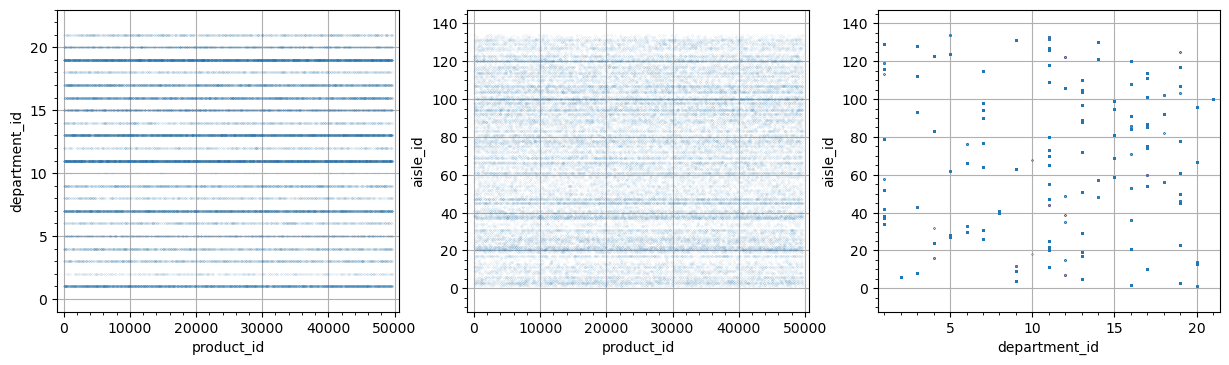

In [18]:
fig, ax = plt.subplots(1,3,figsize=(15,4))

#df = df.reset_index()
pad.plot.scatter(x='product_id',y='department_id',s=0.001,ax=ax[0])
pad.plot.scatter(x='product_id',y='aisle_id',s=0.001,ax=ax[1])
pad.plot.scatter(x='department_id',y='aisle_id',s=0.001,ax=ax[2]);

Nope. Id numbers are scattered over the whole range of values with no apparent signs of correlation pattern, so the numbering is random.

## 3. Customer-related data <a id='3'></a>

The remaining 4 files contain the information about the customer orders. Let's read them in:

In [19]:
orders = pd.read_csv("./data/orders.csv")
products_prior = pd.read_csv("./data/order_products__prior.csv")
products_train = pd.read_csv("./data/order_products__train.csv")
products_pred = pd.read_csv("./data/sample_submission.csv")

print(orders.shape)
print(products_prior.shape) 
print(products_train.shape) 
print(products_pred.shape)

(3421083, 7)
(32434489, 4)
(1384617, 4)
(75000, 2)


1) The central dataset is in the **orders.csv** file (the *o* dataframe). It contains about 3.4M rows with order ids. There's one entry per order_id, and multiple entries (order_ids) per user. An important feature is in the *eval_set* column, which classifies each order as one of the following: the prior order, the future order to be used in model training, and the future order to be used in model testing. The task of this analysis is to predict the products that will be included in the future order from the test step.

2) The file **order_products__prior.csv** (the *pp* dataframe) contains information about the products which were included in prior orders. There are multiple entries per order_id, corresponding to the number of products in that order.

3) The file **order_products__train.csv** (the *pt* dataframe) contain information about the products which are included in the future orders for model testing, again, with more than one product per order_id.

4) The file **sample_submission.csv** (the *ps* datafrane) is a template file that contains order_id for which we  shall predict the product list. 

Let's inspect the files now:

### 3.1 Orders <a id='3.1'></a>

In [20]:
orders.head(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [21]:
orders.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                3421083 non-null  int64  
 1   user_id                 3421083 non-null  int64  
 2   eval_set                3421083 non-null  object 
 3   order_number            3421083 non-null  int64  
 4   order_dow               3421083 non-null  int64  
 5   order_hour_of_day       3421083 non-null  int64  
 6   days_since_prior_order  3214874 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


No missing values really. Nulls in the "days_since_prior_order" column correspond to the first order:

In [22]:
orders[orders['days_since_prior_order'].isna()]['order_number'].unique()

array([1])

Besides that, all info is there.

In [23]:
orders['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [24]:
orders.groupby('user_id')['eval_set'].unique()

user_id
1         [prior, train]
2         [prior, train]
3          [prior, test]
4          [prior, test]
5         [prior, train]
               ...      
206205    [prior, train]
206206     [prior, test]
206207     [prior, test]
206208     [prior, test]
206209    [prior, train]
Name: eval_set, Length: 206209, dtype: object

Are the train/test users uniformly distributed in the data file? Let's plot the cumulative fraction of users in the testing set:

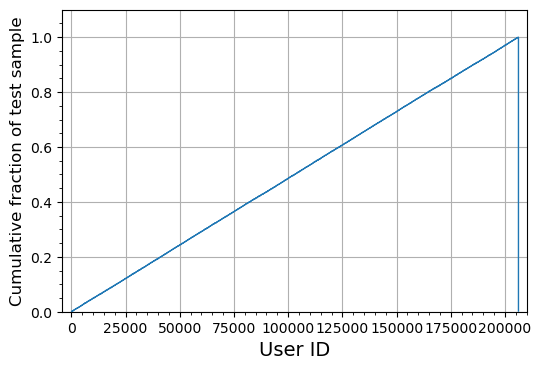

In [25]:
plt.hist(orders[orders['eval_set'].str.contains('test')]['user_id'].values,bins=2000,cumulative=True,histtype='step',density=True)
plt.xlabel('User ID',fontsize=14),plt.ylabel('Cumulative fraction of test sample',fontsize=12);

Yes, they are, the train/test customers are split randomly, as desired.

### 3.2 Products in prior orders <a id='3.2'></a>

In [26]:
products_prior.head(20)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [27]:
products_prior.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Non-Null Count     Dtype
---  ------             --------------     -----
 0   order_id           32434489 non-null  int64
 1   product_id         32434489 non-null  int64
 2   add_to_cart_order  32434489 non-null  int64
 3   reordered          32434489 non-null  int64
dtypes: int64(4)
memory usage: 989.8 MB


### 3.3 Products in future orders for model training <a id='3.3'></a>

In [28]:
products_train.head(20)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [29]:
products_train.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


### 3.4 Products in future orders for model testing (prediction) <a id='3.4'></a>

In [30]:
products_pred.head(10)

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259
5,313,39276 29259
6,353,39276 29259
7,386,39276 29259
8,414,39276 29259
9,418,39276 29259


This is a dummy file, so we have no data to plot. But let's check if the files are cosistent, i.e. are we getting the same order_id sequence as in the orders file for the 'test' subset?:

In [31]:
orders[orders['eval_set']=='test'].sort_values(by='order_id').head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
611292,17,36855,test,5,6,15,1.0
584613,34,35220,test,20,3,11,8.0
3102779,137,187107,test,9,2,19,30.0
1929637,182,115892,test,28,0,11,8.0
590591,257,35581,test,9,6,23,5.0
1888538,313,113359,test,31,6,22,7.0
2880687,353,173814,test,4,4,13,30.0
924638,386,55492,test,8,0,15,30.0
2009806,414,120775,test,18,5,14,8.0
556925,418,33565,test,12,0,12,14.0


It seems we do. Good.

### 3.5 EDA <a id='3.5'></a>

#### 3.5.1 Shop's most popular products <a id='3.5.1'></a>

20 most popular products in prior orders:

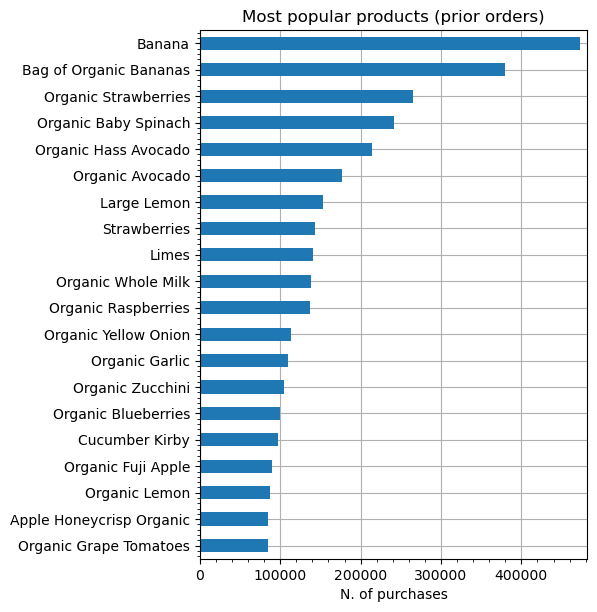

In [32]:
mpp = products_prior['product_id'].value_counts().head(20)
mpp = mpp.reset_index(); mpp.columns = ['product_id','n_ordered']

mpp = mpp.merge(p,on='product_id',how='left')

mpp = mpp.set_index('product_name'); mpp['n_ordered'].sort_values().plot.barh(figsize=(5,7))
plt.xlabel('N. of purchases'); plt.ylabel("");plt.title("Most popular products (prior orders)");

Healthy diet products, potassium on top :-) Bananas is the most frequently bought product.

20 most popular products in future orders (training):

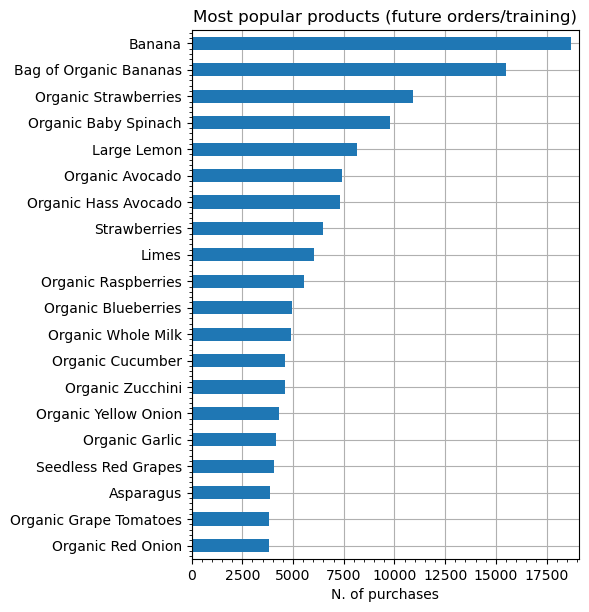

In [33]:
mpp = products_train['product_id'].value_counts().head(20)
mpp = mpp.reset_index(); mpp.columns = ['product_id','n_ordered']

mpp = mpp.merge(p,on='product_id',how='left')

mpp = mpp.set_index('product_name'); mpp['n_ordered'].sort_values().plot.barh(figsize=(5,7))
plt.xlabel('N. of purchases'); plt.ylabel("");plt.title("Most popular products (future orders/training)");

Similar list in the future orders, although the order is slightly changed. In the future orders people will buy more lemons than avocados and more milk than raspberries and blueberries, etc.

#### 3.5.2 Number of customer orders and number of products per order <a id='3.5.2'></a>

How many orders did an average customer purchase?:

In [34]:
orders.groupby('user_id')['eval_set'].count().agg(['min','mean','max']).round(1)

min       4.0
mean     16.6
max     100.0
Name: eval_set, dtype: float64

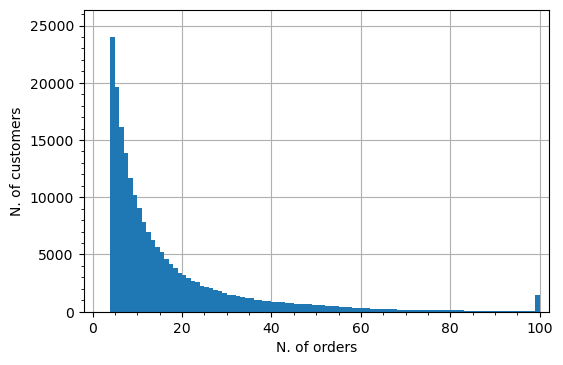

In [35]:
orders.groupby('user_id')['eval_set'].count().plot.hist(bins=100,range=(0,100))
plt.xlabel("N. of orders"); plt.ylabel("N. of customers");

At least 4, at last 100, with an average number of 16.6 orders.

How many products in each order? Let's plot it separately for orders in prior and future orders (for testing, as we only have this info):

In [36]:
# instead of agg(lambda x:x.value_counts()) which would give <lambda> instead of the variable name
def peak(x): 
    return x.value_counts().index[0] 

In [37]:
products_prior.groupby('order_id')['add_to_cart_order'].count().agg(['min',peak,'mean','max']).round(1)

min       1.0
peak      5.0
mean     10.1
max     145.0
Name: add_to_cart_order, dtype: float64

In [38]:
products_train.groupby('order_id')['add_to_cart_order'].count().agg(['min',peak,'mean','max']).round(1)

min      1.0
peak     5.0
mean    10.6
max     80.0
Name: add_to_cart_order, dtype: float64

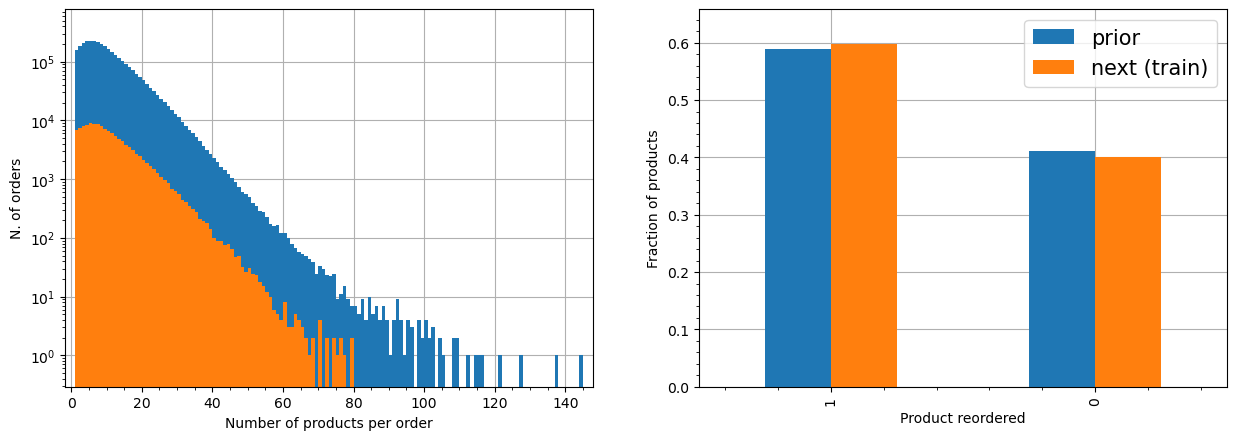

In [39]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

products_prior.groupby('order_id')['add_to_cart_order'].max().plot.hist(bins=144,range=(1,145),ax=ax[0],log=True)
products_train.groupby('order_id')['add_to_cart_order'].max().plot.hist(bins=79,range=(1,80),ax=ax[0])

h = products_prior['reordered'].value_counts(normalize=True)
t = products_train['reordered'].value_counts(normalize=True)
ht =pd.concat((h,t),axis=1); ht.columns=['prior','next (train)']
ht.plot(kind='bar',ax=ax[1])

ax[0].update({'xlabel':'Number of products per order', 'ylabel':'N. of orders'})
ax[1].update({'xlabel':'Product reordered', 'ylabel':'Fraction of products'})
ax[1].legend(fontsize=15);

At least one and at most 145 products in prior orders, with the average of 10.1 products. In the future orders the average number of products is slightly higher, 10.6, although the number of products is never higher than 80. For both classes, the most frequent number of products in the basket is 5. Also, about 60 percent of products are reordered, and this fraction is slightly higher in future orders (orange hist). It seems like customers tend to buy more products with time and come back more willingly to products they know.

The fact that max number of products is higher for prior than for future orders is due to a simple scaling law. At higher number of orders (>30) both spectra show pretty similar exponential dependence, but we have 3.21 M prior and only 0.12 M future orders (see below). So, there's not enough data in the train sampe to see large tails. In a similar manner, the number of future orders in the test/predict sample is only 75k, i.e. about half of the training set. Therefore, we expect to see not more than 65-70 predicted products in that sample (i.e. only in the region where the number of orders in the training sample is above 2). Let's also notice that orders with more than 60 products are roughly 3 orders of magnitude less frequent that orders in the peak. This means that their contribution to the predictive power of a model that we will be bulding is on a sub-permille level, hence negligible.

In [40]:
print('N of users for training:',orders[orders['eval_set'].str.contains('prior')]['user_id'].shape[0])
print('N of users for training:',orders[orders['eval_set'].str.contains('train')]['user_id'].shape[0])
print('N of users for testing:',orders[orders['eval_set'].str.contains('test')]['user_id'].shape[0])

N of users for training: 3214874
N of users for training: 131209
N of users for testing: 75000


##### 3.5.2.1 Number of products vs order number matrix <a id='3.5.2.1'></a>

Let's combine the two plots above. This will help us investigate and define the input data format in the later step of model building.

In [41]:
#'add_to_cart_order' after aggregation gives the number of products per order

products = pd.concat((products_prior,products_train)).groupby('order_id')['add_to_cart_order'].max().reset_index()
orders2 = orders.merge(products,on='order_id',how='left'); 

ord_num = orders2['order_number']
n_prods = orders2['add_to_cart_order']

print('x(min,max)',np.min(ord_num),np.max(ord_num))
print('y(min,max)',np.min(n_prods),np.max(n_prods))

x(min,max) 1 100
y(min,max) 1.0 145.0


Linear scale on z axis:

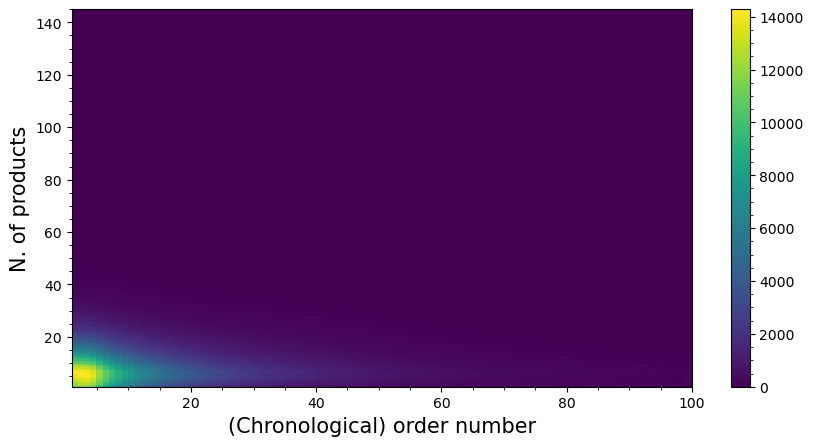

In [42]:
plt.rcParams.update({'axes.labelsize': 15})

plt.figure(figsize=(10, 5))

plt.hist2d(ord_num, n_prods, bins=(99,144),range=[(1,100),(1,145)]); plt.colorbar()

plt.gca().set(xlabel='(Chronological) order number',ylabel='N. of products');

Log scale on z axis:

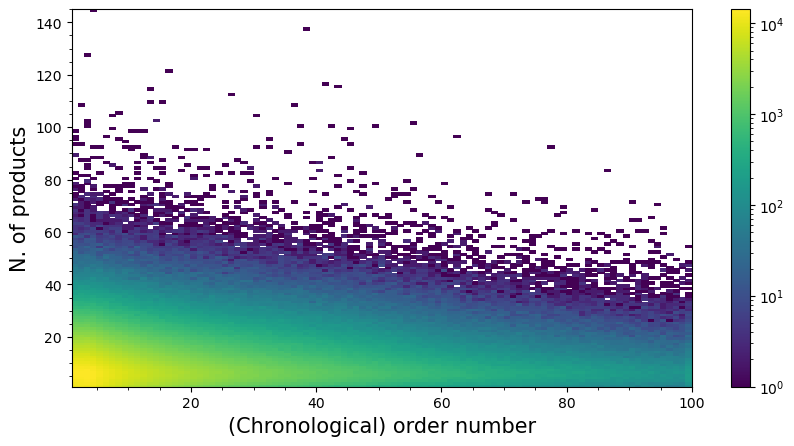

In [43]:
plt.figure(figsize=(10, 5))

plt.hist2d(ord_num, n_prods, bins=(99,144),range=[(1,100),(1,145)],norm=mpl.colors.LogNorm());plt.colorbar()

plt.gca().set(xlabel='(Chronological) order number',ylabel='N. of products');

Eventhough the range of variables is quite qide, most of the customers populate the region of a smaller number of orders and a smaller number of products per order. We can neglect orders with more than 60-80 products, but probably we should keep all the orders from the history.

#### 3.5.3 Customer shopping habits <a id='3.5.3'></a>

Let's plot the three remaining variables present in the "orders" dataframe:

In [44]:
orders['days_since_prior_order'].agg(['min','max']).values

array([ 0., 30.])

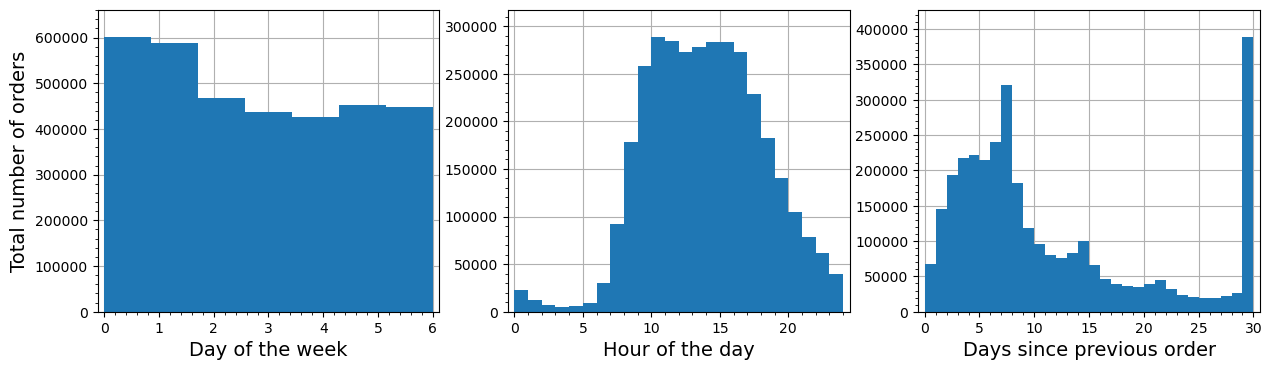

In [45]:
plt.rcParams.update({'axes.labelsize': 14})

fig, ax = plt.subplots(1,3,figsize=(15,4))

x = orders['order_dow']
y = orders['order_hour_of_day']
z = orders['days_since_prior_order']

x.plot.hist(bins=7,range=(0,6),ax=ax[0])
y.plot.hist(bins=24,range=(0,24),ax=ax[1])
z.plot.hist(bins=30,range=(0,30),ax=ax[2])

ax[0].set_xlabel('Day of the week');
ax[1].set_xlabel('Hour of the day');
ax[2].set_xlabel('Days since previous order')
ax[0].set_ylabel('Total number of orders');ax[1].set_ylabel("");ax[2].set_ylabel("");

Orders are placed uniformly over the week, except the first two days when there are about 25% more orders. Are these Sunday and Monday? Then, people are most likely to order during the day, with a peak from 9am to 4pm. Are they ordering from work? :-) In the last plot, the underlaying continuous spectrum has a maximum at about 4 days and a long tail, on top of which there are peaks at 7, 14, 21 and 30 days since previous orer - are these automatic recurring orders? 30 days limit might be an artificial cut off, representing a period not shorter than a month.

Are these variables correlated?

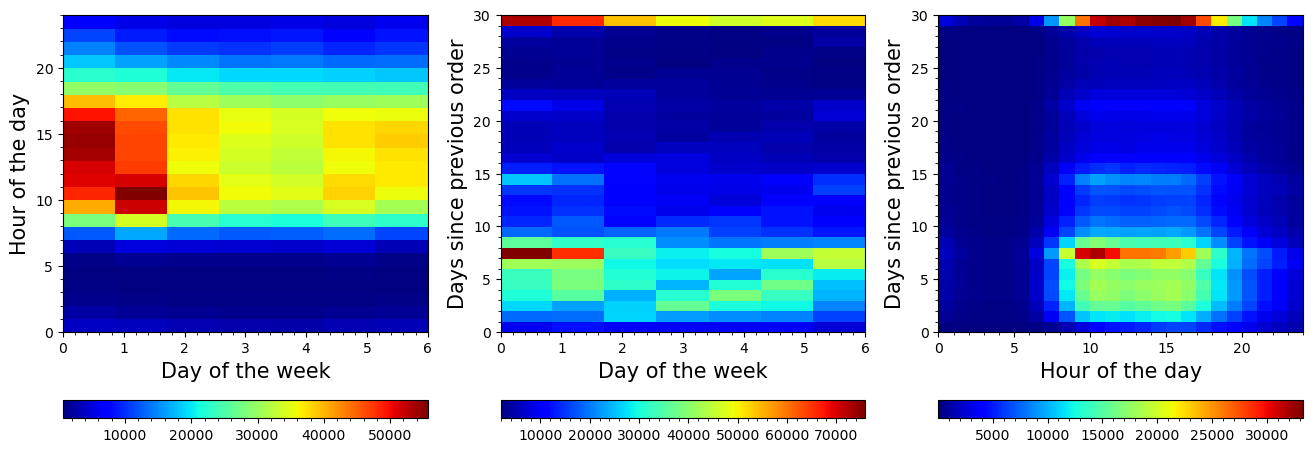

In [46]:
plt.rcParams.update({'axes.labelsize': 15})

fig, ax = plt.subplots(1,3,figsize=(16,6))

pl = [0]*3
pl[0] = ax[0].hist2d( x, y, bins=(7,24), range=[(0,6),(0,24)] ,cmap=plt.cm.jet)
pl[1] = ax[1].hist2d( x, z, bins=(7,30), range=[(0,6),(0,30)] ,cmap=plt.cm.jet)
pl[2] = ax[2].hist2d( y, z, bins=(24,30),range=[(0,24),(0,30)],cmap=plt.cm.jet)

ax[0].update({'xlabel':'Day of the week', 'ylabel':'Hour of the day'})
ax[1].update({'xlabel':'Day of the week', 'ylabel':'Days since previous order'})
ax[2].update({'xlabel':'Hour of the day', 'ylabel':'Days since previous order'})

for i in range(3):
    fig.colorbar(pl[i][3],ax=ax[i], orientation="horizontal");
    
#https://stackoverflow.com/questions/28825594/why-doesnt-the-matplotlib-label-fontsize-work
#https://stackoverflow.com/questions/44563118/colorbar-2d-histogram-python

Very little correlation. Maybe only seen in the middle plot. Those who order during week days tend to order more frequently than those ordering during the weekend. Not sure if this correlation influences the customer basket, though.

 Does number of products per order depends on any of these three variables?

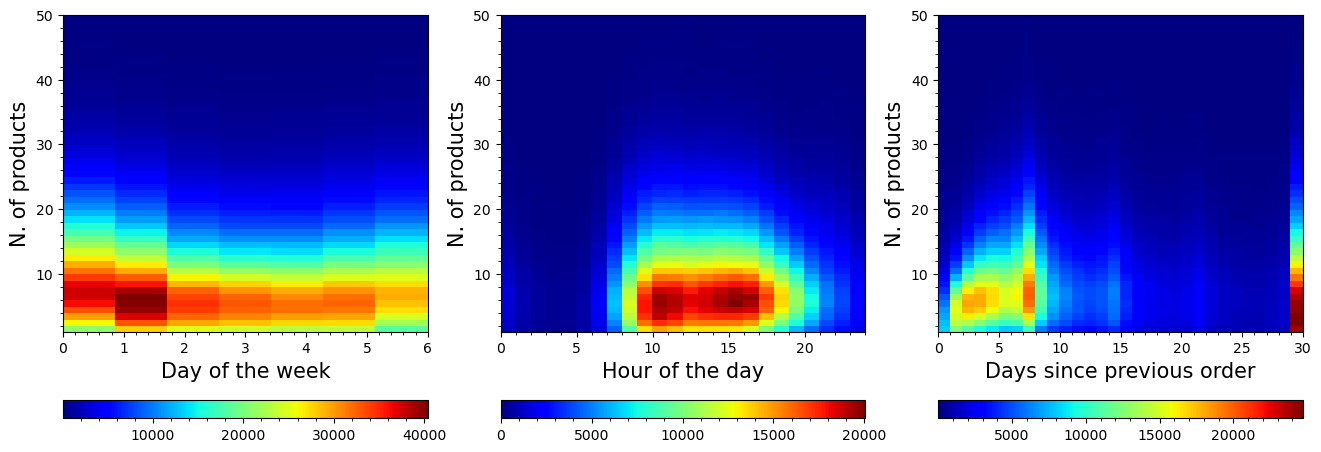

In [47]:
plt.rcParams.update({'axes.labelsize': 15})

fig, ax = plt.subplots(1,3,figsize=(16,6))

#w = ord_num; wbins=49; wrange=(1,50); wlabel='Order_number'
w = n_prods; wbins=49; wrange=(1,50); wlabel='N. of products'

pl = [0]*3
pl[0] = ax[0].hist2d( x, w, bins=(7,wbins), range=[(0,6),wrange] ,cmap=plt.cm.jet)
pl[1] = ax[1].hist2d( y, w, bins=(24,wbins), range=[(0,24),wrange] ,cmap=plt.cm.jet)
pl[2] = ax[2].hist2d( z, w, bins=(30,wbins),range=[(0,30),wrange],cmap=plt.cm.jet)

ax[0].update({'xlabel':'Day of the week','ylabel': wlabel})
ax[1].update({'xlabel':'Hour of the day','ylabel': wlabel})
ax[2].update({'xlabel':'Days since previous order','ylabel': wlabel})

for i in range(3):
    fig.colorbar(pl[i][3],ax=ax[i], orientation="horizontal");

Those who order on the weekend (day 6 and day 0, assuming day 0 is Sunday) select more items than those ordering in the middle of the week. Also, the number of products increases with days since previous order until about day 5 (though with large variance), then it remains pretty constant, except the orders longer than a month (the days=30 bin) for which it's lower again. However, these are rather small effects and it's unclear if they are beneficial for any model training.